### Import packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load data

In [3]:
# Load the CSV data
baseline = []
baseline.append(pd.read_csv('../results/baseline_1080.csv'))
baseline.append(pd.read_csv('../results/baseline_720.csv'))
baseline.append(pd.read_csv('../results/baseline_480.csv'))
baseline.append(pd.read_csv('../results/baseline_240.csv'))

# Clean column names
for i in range(len(baseline)):
    baseline[i].columns = baseline[i].columns.str.strip()

video = []
video.append(pd.read_csv('../results/video_1080.csv'))
video.append(pd.read_csv('../results/video_720.csv'))
video.append(pd.read_csv('../results/video_480.csv'))
video.append(pd.read_csv('../results/video_240.csv'))

for i in range(len(video)):
    video[i].columns = video[i].columns.str.strip()

video_calibration = []
video_calibration.append(pd.read_csv('../results/calibration_1080.csv'))
video_calibration.append(pd.read_csv('../results/calibration_720.csv'))
video_calibration.append(pd.read_csv('../results/calibration_480.csv'))
video_calibration.append(pd.read_csv('../results/calibration_240.csv'))

for i in range(len(video_calibration)):
    video_calibration[i].columns = video_calibration[i].columns.str.strip()

metrics = pd.read_csv('../results/metrics.csv')
metrics.columns = metrics.columns.str.strip()

### Elbow and Silhouette Methods

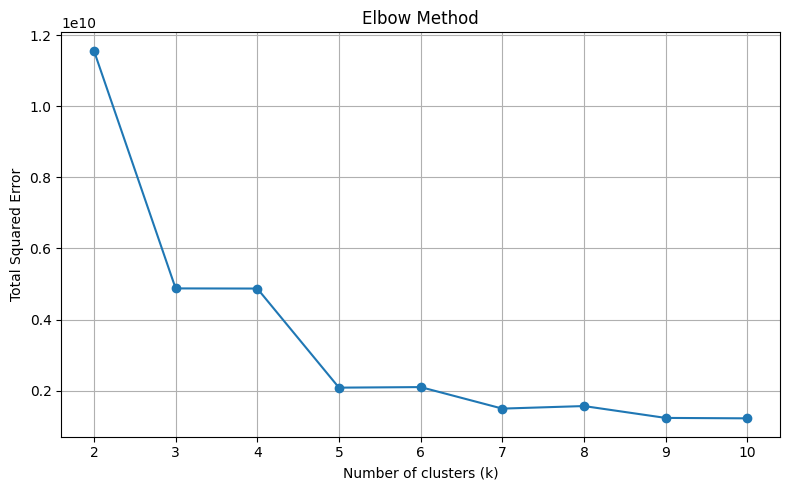

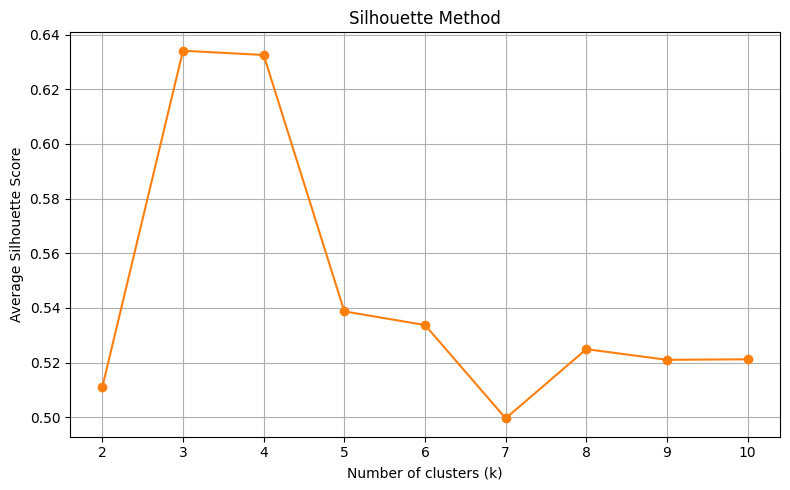

In [4]:
k_values = np.arange(2, 2 + len(metrics))

# Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, metrics['Elbow method total squared error'], marker='o', linestyle='-', color='C0')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Total Squared Error')
plt.title('Elbow Method')
plt.grid(True)
plt.tight_layout()
plt.savefig('elbow_method.png', dpi=100, bbox_inches='tight')
plt.show()

# Silhouette Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, metrics['Silhouette method average score'], marker='o', linestyle='-', color='C1')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Method')
plt.grid(True)
plt.tight_layout()
plt.savefig('silhouette_method.png', dpi=100, bbox_inches='tight')
plt.show()

### Distances plot

Summary 1080p — Best: Squared euclidean distance = 0.376570 s (2.66 FPS)
Summary 720p — Best: Squared euclidean distance = 0.169391 s (5.90 FPS)
Summary 480p — Best: Chebyshev distance = 0.070472 s (14.19 FPS)
Summary 240p — Best: Squared euclidean distance = 0.016335 s (61.22 FPS)


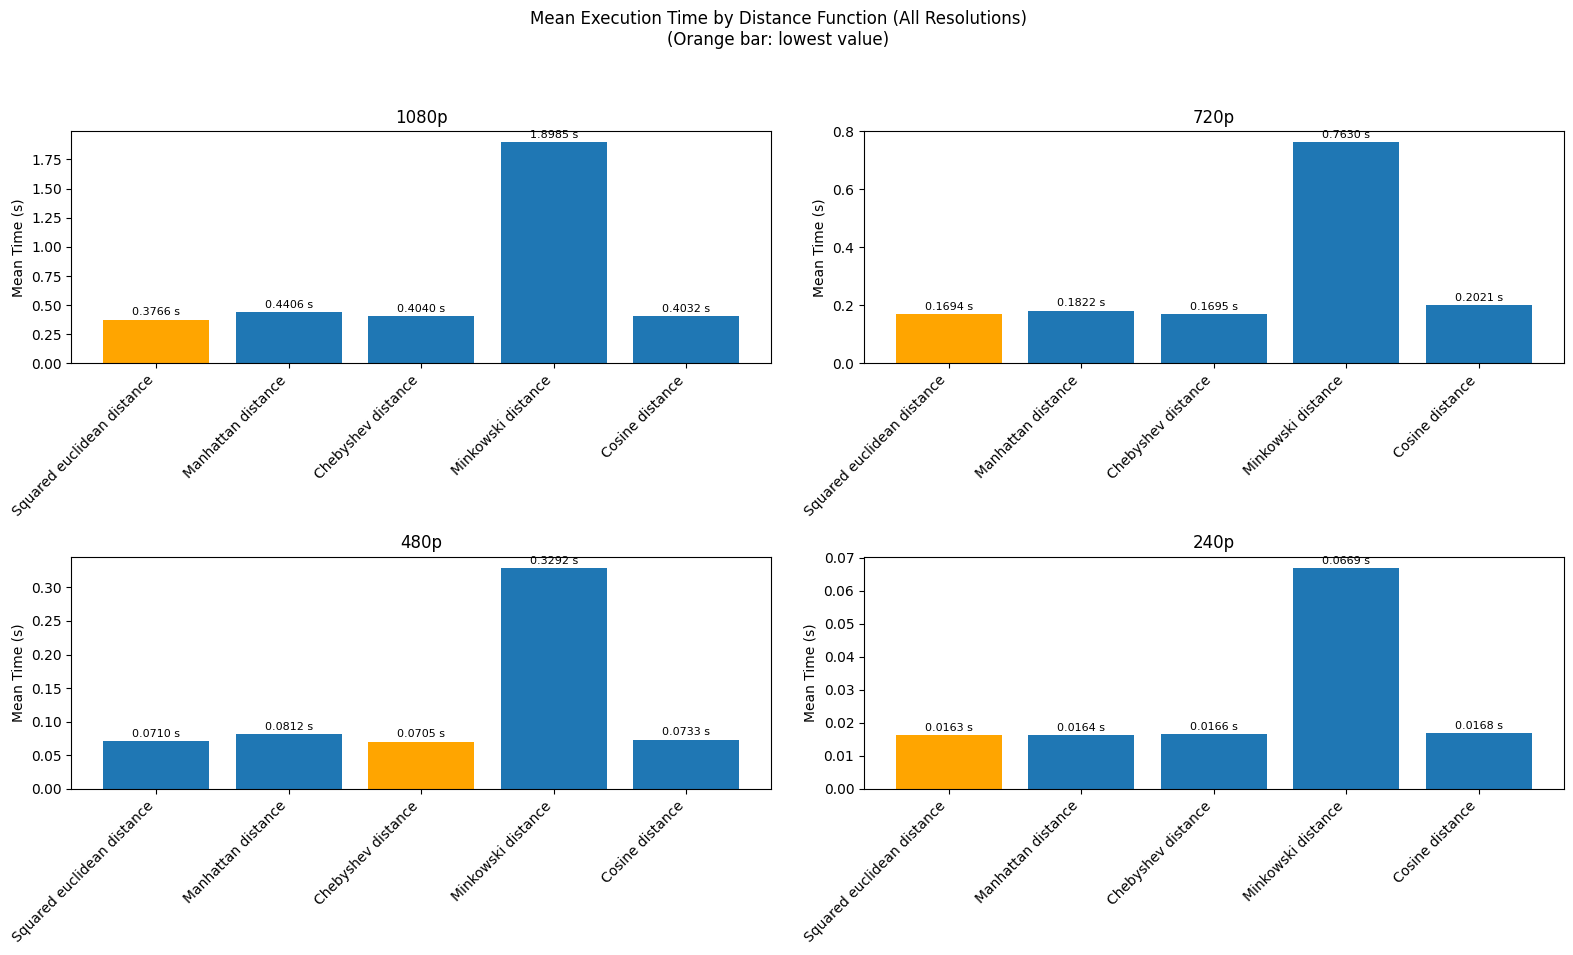

In [5]:
resolutions = ['1080p', '720p', '480p', '240p']
n = len(baseline)

# --- Save each plot individually ---
for i in range(n):
    means = baseline[i].mean()
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(means)), means.values)
    plt.title(f'Mean Execution Time by Distance Function')
    plt.ylabel('Mean Time (seconds)')
    plt.xticks(range(len(means)), [col.replace('_', '\n') for col in means.index], rotation=45, ha='right')
    for j, value in enumerate(means.values):
        plt.text(j, value + max(means.values)*0.01, f'{value:.4f} s', ha='center', va='bottom')
    plt.tight_layout()
    plt.savefig(f'mean_times_{resolutions[i]}.png', dpi=100, bbox_inches='tight')
    plt.close()

# --- Show all in a single subplot figure ---
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()
for i in range(n):
    means = baseline[i].mean()
    min_idx = np.argmin(means.values)
    colors = ['C0'] * len(means)
    colors[min_idx] = 'orange'  # Highlight the minimum bar

    bars = axes[i].bar(range(len(means)), means.values, color=colors)
    axes[i].set_title(f'{resolutions[i]}')
    axes[i].set_ylabel('Mean Time (s)')
    axes[i].set_xticks(range(len(means)))
    axes[i].set_xticklabels([col.replace('_', '\n') for col in means.index], rotation=45, ha='right')
    for j, value in enumerate(means.values):
        axes[i].text(j, value + max(means.values)*0.01, f'{value:.4f} s', ha='center', va='bottom', fontsize=8)
    
    # Print best time and FPS for subplot summary
    best_col = means.index[min_idx]
    best_time = means.values[min_idx]
    fps = 1.0 / best_time if best_time > 0 else float('inf')
    print(f"Summary {resolutions[i]} — Best: {best_col} = {best_time:.6f} s ({fps:.2f} FPS)")

plt.suptitle('Mean Execution Time by Distance Function (All Resolutions)\n(Orange bar: lowest value)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### GPU Implementations plot

Summary 1080p — Best: k-means++ reduce = 0.015298 s (65.37 FPS) Speedup: 24.62x
Summary 720p — Best: k-means++ reduce = 0.008062 s (124.04 FPS) Speedup: 21.01x
Summary 480p — Best: k-means++ reduce = 0.005069 s (197.27 FPS) Speedup: 14.00x
Summary 240p — Best: k-means++ = 0.002199 s (454.66 FPS) Speedup: 7.43x


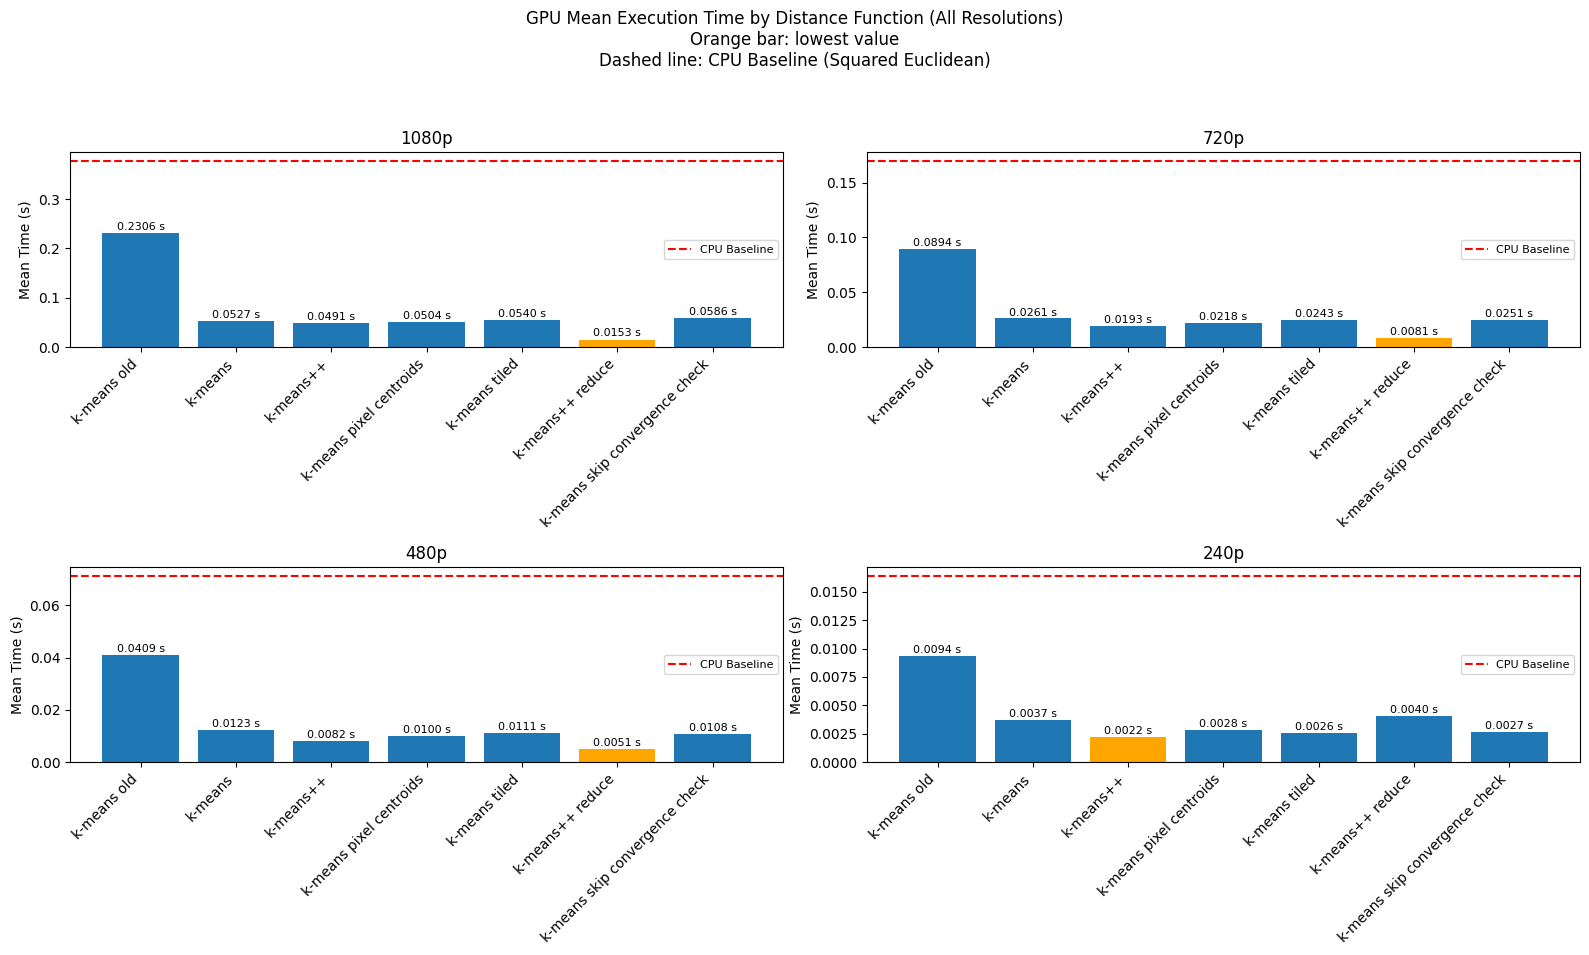

In [6]:
resolutions = ['1080p', '720p', '480p', '240p']
n = len(video)

# --- Save each GPU plot individually with CPU baseline line ---
for i in range(n):
    means = video[i].mean()
    cpu_baseline = baseline[i].mean().iloc[0]  # First column (squared euclidean)
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(means)), means.values)
    plt.title(f'GPU Mean Execution Time by Distance Function')
    plt.ylabel('Mean Time (seconds)')
    plt.xticks(range(len(means)), [col.replace('_', '\n') for col in means.index], rotation=45, ha='right')
    for j, value in enumerate(means.values):
        plt.text(j, value + max(means.values)*0.01, f'{value:.4f} s', ha='center', va='bottom')
    # Add dashed line for CPU baseline
    plt.axhline(cpu_baseline, color='red', linestyle='--', label='CPU Baseline (Squared Euclidean)')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'gpu_mean_times_{resolutions[i]}.png', dpi=100, bbox_inches='tight')
    plt.close()

# --- Show all GPU plots in a single subplot figure with CPU baseline line ---
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()
for i in range(n):
    means = video[i].mean()
    cpu_baseline = baseline[i].mean().iloc[0]
    min_idx = np.argmin(means.values)
    colors = ['C0'] * len(means)
    colors[min_idx] = 'orange'  # Highlight the minimum bar

    bars = axes[i].bar(range(len(means)), means.values, color=colors)
    axes[i].set_title(f'{resolutions[i]}')
    axes[i].set_ylabel('Mean Time (s)')
    axes[i].set_xticks(range(len(means)))
    axes[i].set_xticklabels([col.replace('_', '\n') for col in means.index], rotation=45, ha='right')
    for j, value in enumerate(means.values):
        axes[i].text(j, value + max(means.values)*0.01, f'{value:.4f} s', ha='center', va='bottom', fontsize=8)
    # Add dashed line for CPU baseline
    axes[i].axhline(cpu_baseline, color='red', linestyle='--', label='CPU Baseline')
    axes[i].legend(fontsize=8)

    # Print best time and FPS for subplot summary
    best_col = means.index[min_idx]
    best_time = means.values[min_idx]
    fps = 1.0 / best_time if best_time > 0 else float('inf')
    print(f"Summary {resolutions[i]} — Best: {best_col} = {best_time:.6f} s ({fps:.2f} FPS) Speedup: {cpu_baseline / best_time:.2f}x")

plt.suptitle('GPU Mean Execution Time by Distance Function (All Resolutions)\nOrange bar: lowest value\nDashed line: CPU Baseline (Squared Euclidean)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### GPU with Video calibration comparison plot

1080p — Best: GPU calibration = 0.003439 s (290.74 FPS) Speedup: 109.49x
720p — Best: GPU calibration = 0.001952 s (512.22 FPS) Speedup: 86.77x
480p — Best: GPU calibration = 0.001448 s (690.57 FPS) Speedup: 49.00x
240p — Best: GPU calibration = 0.000947 s (1055.72 FPS) Speedup: 17.25x


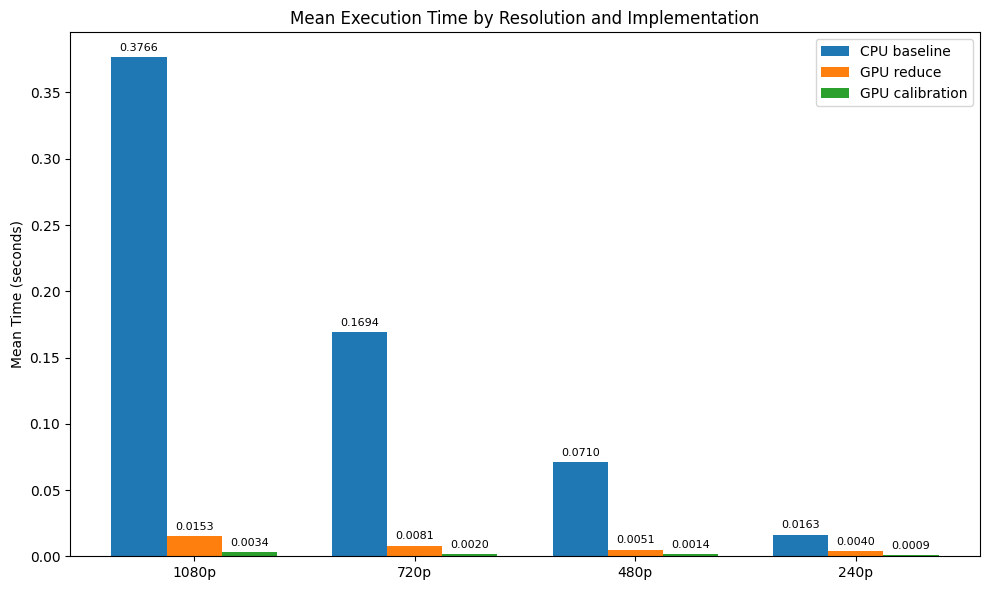

In [7]:
import numpy as np
import matplotlib.pyplot as plt

resolutions = ['1080p', '720p', '480p', '240p']
n = len(resolutions)

# Prepare data for each resolution
cpu = [baseline[i].mean().iloc[0] for i in range(n)]  # CPU baseline (first column)
gpu = [video[i].mean().iloc[5] for i in range(n)]     # GPU kmeans++ reduce (6th column)
gpu_cal = [video_calibration[i].mean().iloc[0] for i in range(n)]  # GPU calibration (first column)

x = np.arange(n)
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, cpu, width, label='CPU baseline')
rects2 = ax.bar(x, gpu, width, label='GPU reduce')
rects3 = ax.bar(x + width, gpu_cal, width, label='GPU calibration')

ax.set_ylabel('Mean Time (seconds)')
ax.set_title('Mean Execution Time by Resolution and Implementation')
ax.set_xticks(x)
ax.set_xticklabels(resolutions)
ax.legend()

# Add value labels
for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Print best time and FPS per resolution
for i in range(n):
    times = {'CPU baseline': cpu[i], 'GPU reduce': gpu[i], 'GPU calibration': gpu_cal[i]}
    best_impl = min(times, key=times.get)
    best_time = times[best_impl]
    fps = 1.0 / best_time if best_time > 0 else float('inf')
    print(f"{resolutions[i]} — Best: {best_impl} = {best_time:.6f} s ({fps:.2f} FPS) Speedup: {cpu[i] / best_time:.2f}x")

plt.tight_layout()
plt.savefig(f'time_comparison.png', dpi=100, bbox_inches='tight')
plt.show()

### Multicore results

Results show OpenACC multicore parallelization doesn't work well with these GPU optimized algorithms, probably due to thread creation / synchronization overhead, data bottlenecks and too fine-grained loops. 
However, they do show some similarities in relative times to the GPU-executed algorithms.

Lower values of cores involved will show faster execution.

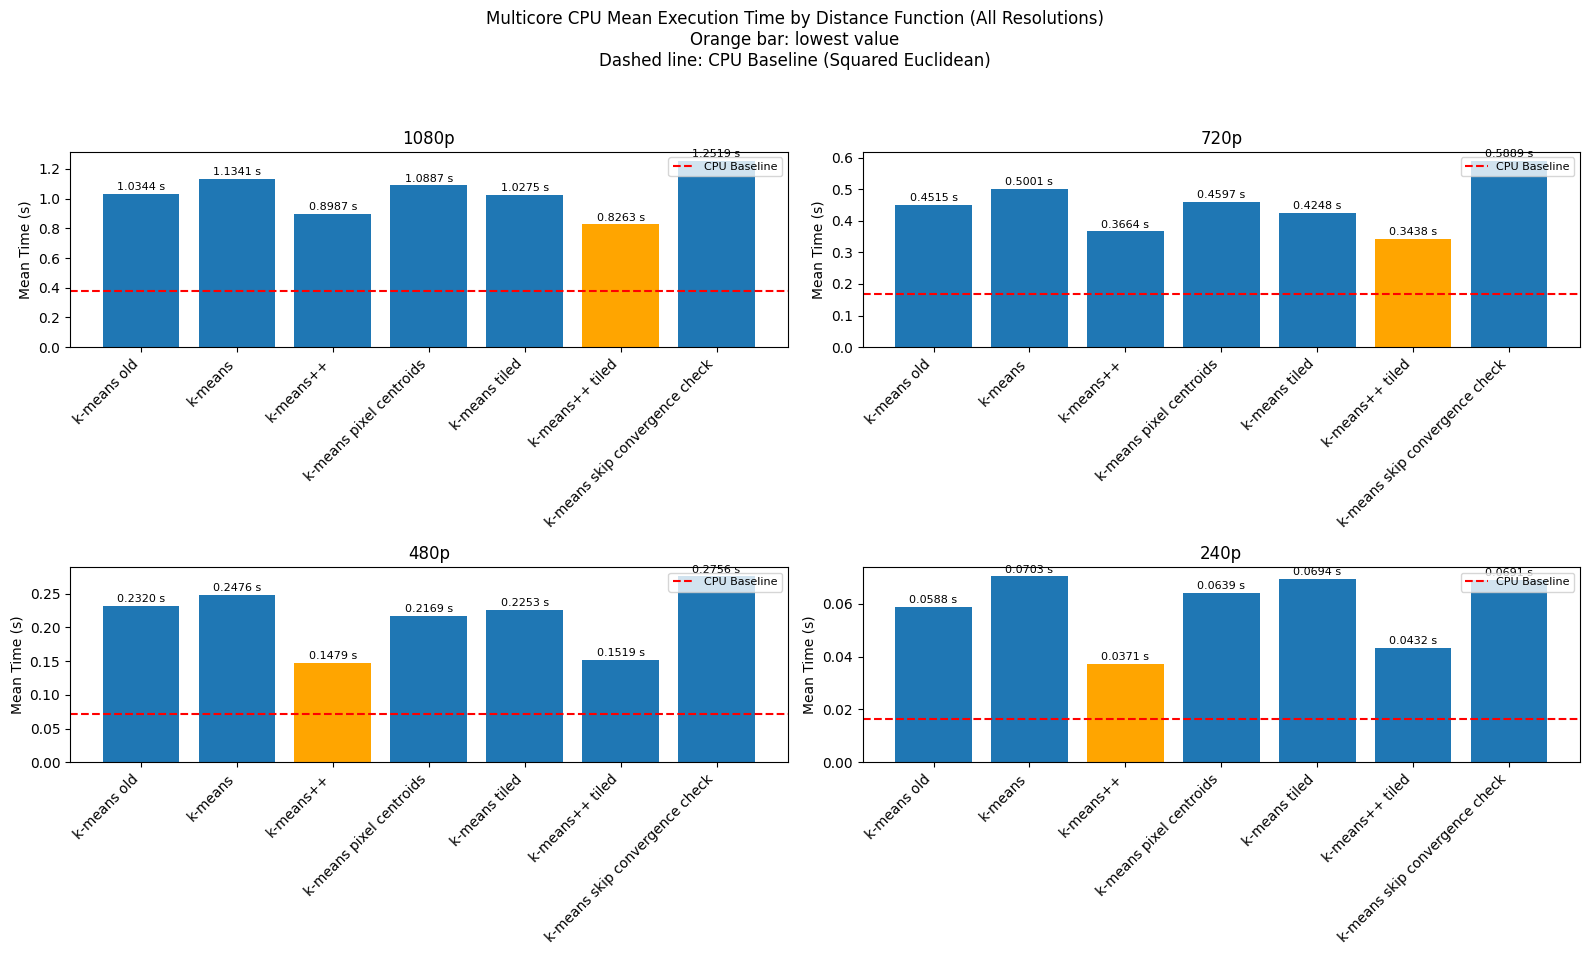

In [8]:
import os

multicore = []
resolutions_mc = ['1080', '720', '480', '240']
available_resolutions = []

for res in resolutions_mc:
    path = f'../results/multicore_{res}.csv'
    if os.path.exists(path):
        multicore.append(pd.read_csv(path))
        available_resolutions.append(res)
    else:
        print(f"Warning: {path} not found, skipping")

for i in range(len(multicore)):
    multicore[i].columns = multicore[i].columns.str.strip()

# --- Show all Multicore plots in a single subplot figure with CPU baseline line ---
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# Hide all subplots initially
for ax in axes:
    ax.set_visible(False)

# Create a mapping of resolutions to subplot positions
resolution_positions = {
    '1080': 0,  # Top-left
    '720': 1,   # Top-right
    '480': 2,   # Bottom-left
    '240': 3    # Bottom-right
}

for i, res in enumerate(available_resolutions):
    pos = resolution_positions[res]
    axes[pos].set_visible(True)
    
    means = multicore[i].mean()
    cpu_baseline = baseline[i].mean().iloc[0]
    min_idx = np.argmin(means.values)
    colors = ['C0'] * len(means)
    colors[min_idx] = 'orange'  # Highlight the minimum bar

    bars = axes[pos].bar(range(len(means)), means.values, color=colors)
    axes[pos].set_title(f'{res}p')
    axes[pos].set_ylabel('Mean Time (s)')
    axes[pos].set_xticks(range(len(means)))
    axes[pos].set_xticklabels([col.replace('_', '\n') for col in means.index], rotation=45, ha='right')
    for j, value in enumerate(means.values):
        axes[pos].text(j, value + max(means.values)*0.01, f'{value:.4f} s', ha='center', va='bottom', fontsize=8)
    # Add dashed line for CPU baseline
    axes[pos].axhline(cpu_baseline, color='red', linestyle='--', label='CPU Baseline')
    axes[pos].legend(fontsize=8, loc='upper right')

plt.suptitle('Multicore CPU Mean Execution Time by Distance Function (All Resolutions)\nOrange bar: lowest value\nDashed line: CPU Baseline (Squared Euclidean)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()